In [37]:
import numpy as np
import pandas as pd
import scipy.stats as scs 
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
from statsmodels.formula.api import ols

### Inlämningsuppgift - Statistiska Metoder AI23
---
# Diamonds

In [ ]:
# Det givna datasettet. https://www.kaggle.com/datasets/shivam2503/diamonds
diamonds = pd.read_csv('diamonds.csv')

# Tar bort de diamanter som har 0mm i x, y eller z och där med ingen volym.
diamonds = diamonds[diamonds['x'] > 0]
diamonds = diamonds[diamonds['y'] > 0]
diamonds = diamonds[diamonds['z'] > 0]

# Och tar bort de värsta outliers som det inte heller verkar som att det finns någon förklaring till i dokumentationen.
diamonds = diamonds[diamonds['x'] < 12]
diamonds = diamonds[diamonds['y'] < 12]
diamonds = diamonds[diamonds['z'] < 12]

# Lägger till en kolumn för volym
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Skapar en kolumn för rankning av 'cut', 'color' och 'clarity' då de är kategoriska variabler.
diamonds['cut_rank'] = diamonds['cut']
diamonds['cut_rank'].replace({'Fair': 5, 'Good': 4, 'Very Good': 3, 'Premium': 2, 'Ideal': 1}, inplace=True)

diamonds['color_rank'] = diamonds['color']
diamonds['color_rank'].replace({'J': 7, 'I': 6, 'H': 5, 'G': 4, 'F': 3, 'E': 2, 'D': 1}, inplace=True)

diamonds['clarity_rank'] = diamonds['clarity']
diamonds['clarity_rank'].replace({'I1': 8, 'SI2': 7, 'SI1': 6, 'VS2': 5, 'VS1': 4, 'VVS2': 3, 'VVS1': 2, 'IF': 1}, inplace=True)

# Funktionen .replace() verkar vara på väg att avvecklas, men gör jobbet för nu.

In [85]:
diamonds_sample = diamonds.sample(10000)

---
## Plocka diamanter ur en påse

**1. Sannolikheten att plocka en diamant som är en av de topp tre bästa färgerna (D, E och F).**


In [40]:
best_colors = diamonds['color'].value_counts(normalize=True).loc[['D', 'E', 'F']].sum()
print(f"Sannolikheten att helt slumpmässigt plocka upp en diamant med någon av de tre bästa färgerna är {best_colors*100:.2f}%.")

# Kontrollräkning för att se till att procentsatsen stämmer.
worst_colors = diamonds['color'].value_counts(normalize=True).loc[['G', 'H', 'I', 'J']].sum()
print("All data är medräknad.") if worst_colors + best_colors == 1 else print("Något gick fel.")

Sannolikheten att helt slumpmässigt plocka upp en diamant med någon av de tre bästa färgerna är 48.42%.
All data är medräknad.


**2. Sannolikheten att plocka tre stycken diamanter i rad där alla tre har ett värde över genomsnittspriset.**

$$

In [80]:
mean_price = diamonds['price'].mean()

N = len(diamonds)
n = 3

p = len(diamonds[diamonds['price'] > mean_price]) / N**n
print(f"Sannolikheten att helt slumpmässigt plocka upp tre diamanter som alla har ett värde över medelpriset är {p*100:.8f}%.")

Sannolikheten att helt slumpmässigt plocka upp tre diamanter som alla har ett värde över medelpriset är 0.00000001%.


## Karat-data

In [81]:
carat = diamonds['carat']

carat_mean = carat.mean()
carat_median = carat.median()
carat_skew = carat.skew()

print(f"Medelvikten bland diamanterna är {carat_mean:.4f} karat, och medianvikten är {carat_median:.4f} karat, med en snedhet på {carat_skew:.4f}, (alltså sned åt {"höger" if carat_skew > 0 else "vänster"}).")

Medelvikten bland diamanterna är 0.7977 karat, och medianvikten är 0.7000 karat, med en snedhet på 1.1162, (alltså sned åt höger).


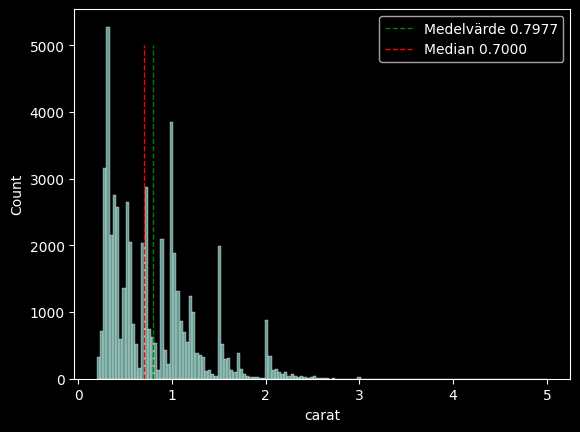

In [56]:
fig, ax = plt.subplots()
sns.histplot(carat)

plt.plot([carat_mean, carat_mean], [0, 5000], color='green', linestyle='--', linewidth=1, label=f'Medelvärde {carat_mean:.4f}')
plt.plot([carat_median, carat_median], [0, 5000], color='red', linestyle='--', linewidth=1, label=f'Median {carat_median:.4f}')

legend = plt.legend(loc='upper right')
plt.show()

## Konfidensintervall

Vad är 

## Hypotestest

H_A osv

## Korrelationsanalys

<Axes: >

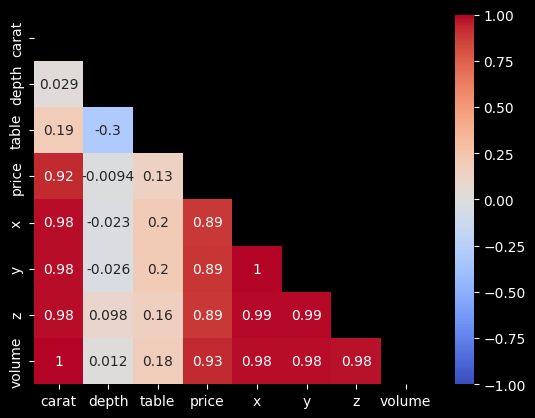

In [87]:
corr = diamonds_sample[['carat','depth','table','price','x','y','z','volume']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

### Interaktiv korrelationsgraf

Klicka bort "cut" i legenden för att se specifika korrelationer.

In [86]:
fig = px.scatter(diamonds_sample,
        x='volume',
        y='price',
        color='cut',
        log_x=True,
        trendline='ols',
        title='Price vs Volume',
        labels={'volume':'Volume', 
                'price':'Price (USD)', 
                'clarity':'Clarity',
                'cut':'Cut',
                'color':'Color',
                'carat':'Carat',
                'depth':'Depth',},
        template='plotly_dark',
        hover_data=['carat', 
                'cut', 
                'color', 
                'depth', 
                'table', 
                'x', 'y', 'z',
                'cut_rank',
                'color_rank',
                'clarity_rank'],
        marginal_x='histogram',
        marginal_y='violin',
        )

fig.update_layout(autosize=False, width=1500, height=800, legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.80))

c:\Users\isaka\.virtualenvs\StatMetAi23-Isak-Andersson-e2nV03pU\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

